# HACTIV8_Batch5 - Assignment 2

- Kode Peserta : PYTN-KS16-08
- Nama : Erwin Hariadi
- Datasource = https://www.kaggle.com/new-york-city/nyc-property-sales

# Project Overview

This dataset is a record of every building or building unit (apartment, etc) sold in the New York City property market over a 12-month period

This dataset contains the location, address, type, sale price and sale date of building units sold. A reference on the trickier fields:
- BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
- BLOCK; LOT: The combination of borough, block and lot forms a unique key for property in New York CIty. Commonly called a BBL
- BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time

# Data Preparation

In [158]:
#mengimport library
import math
import statistics as st
import scipy.stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from IPython.display import Math, Latex
from IPython.core.display import Image
import numpy as np
import pandas as pd

In [159]:
#membaca dataset
data = pd.read_csv('nyc-rolling-sales.csv')

In [160]:
#mengcopy dataset diatas agar data tidak corrupt
df = data.copy()

In [161]:
#menampilkan data teratas
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


# Data Preprocessing

In [162]:
# Mengubah nilai BOROUGH sesuai kriteria pada project overview dalam dataset

df['BOROUGH'] = df.BOROUGH.replace({1: "Manhattan", 2: "Bronx", 3: "Brooklyn", 4: "Queens", 5: "Staten Islands"})
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [163]:
# Menghapus column
df.drop(columns=['Unnamed: 0', 'EASE-MENT', 'APARTMENT NUMBER'], axis= 1, inplace=True)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [164]:
#mengetahui info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  object
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   ZIP CODE                        84548 non-null  int64 
 9   RESIDENTIAL UNITS               84548 non-null  int64 
 10  COMMERCIAL UNITS                84548 non-null  int64 
 11  TOTAL UNITS                     84548 non-null  int64 
 12  LAND SQUARE FEET                84548 non-null

In [165]:
# Mengubah tipe data beberapa kolom
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  object        
 1   NEIGHBORHOOD                    84548 non-null  object        
 2   BUILDING CLASS CATEGORY         84548 non-null  object        
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84548 non-null  object        
 7   ADDRESS                         84548 non-null  object        
 8   ZIP CODE                        84548 non-null  int64         
 9   RESIDENTIAL UNITS               84548 non-null  int64         
 10  COMMERCIAL UNITS                84548 non-null  int64         
 11  TO

In [167]:
# Untuk menghitung missing values di dataset
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

# Data Cleaning

In [168]:
# Untuk mengganti semua nilai kosong (' ') dengan NaN
df.replace(' ',np.nan, inplace=True)

# Menghitung banyak missing values
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [169]:
# Untuk mengisi nilai NaN dalam kolom 'LAND SQUARE FEET' dengan nilai rata-rata dari kolom tersebut.
df['LAND SQUARE FEET'].fillna(df['LAND SQUARE FEET'].mean(), inplace=True)

# Untuk mengisi nilai NaN dalam kolom 'GROSS SQUARE FEET' dengan nilai rata-rata dari kolom tersebut.
df['GROSS SQUARE FEET'].fillna(df['GROSS SQUARE FEET'].mean(), inplace=True)

df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [170]:
# Menghapus baris yang mengandung nilai NaN dari dataset
df = df.dropna()

df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [171]:
#mengecek dan menghapus data duplicate
print("Duplicate Data: ",df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Data Akhir: ",df.duplicated().sum())

Duplicate Data:  380
Data Akhir:  0


In [172]:
df.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,68934.000000,68934.000000,68934.000000,68934.000000,68934.000000,68934.000000,6.893400e+04,6.893400e+04,68934.000000,6.893400e+04
mean,4207.065425,365.869905,10799.695636,1.893376,0.165724,2.079424,3.682868e+03,3.707119e+03,1817.367467,1.270954e+06
std,3434.933083,652.366450,987.208476,14.359786,9.041035,17.074241,3.331437e+04,2.434511e+04,491.226548,1.144376e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1356.250000,21.000000,10307.000000,0.000000,0.000000,1.000000,1.900000e+03,1.280000e+03,1920.000000,2.290000e+05
50%,3390.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.950000e+03,2.400000e+03,1939.000000,5.300000e+05
75%,6191.750000,453.000000,11249.000000,2.000000,0.000000,2.000000,3.941676e+03,4.045707e+03,1965.000000,9.500000e+05
max,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,2.210000e+09


# Measure of Central Tendency

### 1. Mean

In [173]:
totalunits = df.groupby(['BOROUGH'])['TOTAL UNITS'].sum().reset_index()
totalunits
mean_tots = totalunits['TOTAL UNITS'].mean()
print('Mean of Total Units per Borough : ', mean_tots)

Mean of Total Units per Borough :  28668.6


Rata-rata unit per borough adalah 28668 unit

### 2. Median

In [174]:
median_year_built = df['YEAR BUILT'].median()
print("Median Year Built :", median_year_built)

Median Year Built : 1939.0


Median tahun pembangunan adalah di tahun 1939

### 3. Mode

In [175]:
mode_year_built = df['YEAR BUILT'].mode()
print("Mode Year Built :", mode_year_built[0])

Mode Year Built : 1920


Tahun pembangunan terbanyak pada tahun 1920

# Measure of Spread

### 1. Range

In [176]:
min_year = df['YEAR BUILT'].min()
max_year = df['YEAR BUILT'].max()

data_range = max_year - min_year
print("Range Year Built : ", data_range)

Range Year Built :  2017


Range pembangunan tertua hingga terbaru adalah 2017 tahun

### 2. Variance

In [177]:
variance_year_built = df['YEAR BUILT'].var()
print("Variance Year Built : ", variance_year_built)

Variance Year Built :  241303.52169037287


Variansi/persebaran data pada data diatas adalah 241303. Semakin tinggi variansi maka semakin besar penyebaran data

### 3. Standard Deviation

In [178]:
std_dev_year_built = df['YEAR BUILT'].std()
print("Std Deviation Year Built : ", std_dev_year_built)

Std Deviation Year Built :  491.2265482344912


Standar Deviasi adalah ukuran/seberapa jauh titik data individu dari nila rata-rata. Semakin tinggi nilai deviasi maka semakin tinggi dispersi data.

# Probability Distribution

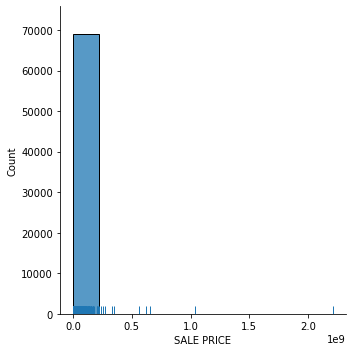

In [179]:
sns.displot(df['SALE PRICE'], bins=10, rug=True)

Visualisasi Distribusi Data dengan histogram

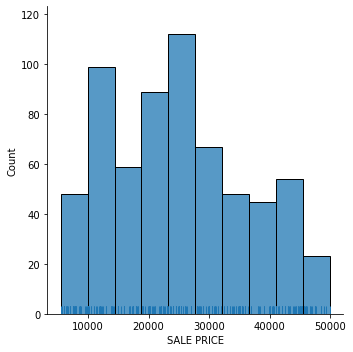

In [180]:
dfProb = df[(df['SALE PRICE'] > 5000) & (df['SALE PRICE'] < 50000)]
sns.displot(dfProb['SALE PRICE'], bins=10, rug=True)

C:\Users\ACER NITRO 5\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 720x1440 with 0 Axes>

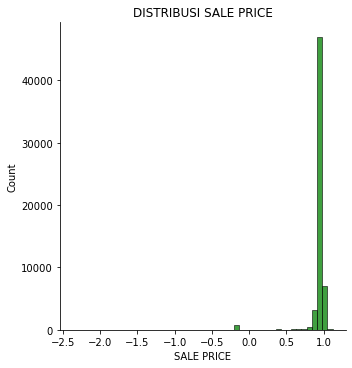

In [181]:
saleprice['SALE PRICE'] = np.log(saleprice['SALE PRICE'])
plt.figure(figsize=(10,20))
sns.displot(saleprice['SALE PRICE'], bins=50, color='green')
plt.title('DISTRIBUSI SALE PRICE')
plt.show()

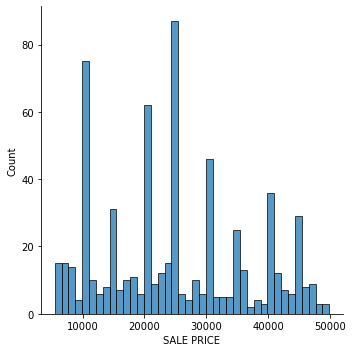

In [182]:
sns.displot(dfProb['SALE PRICE'], bins=40)

Subset dan plot distribusi harga jual properti


# Confidence Intervals

In [183]:
df.groupby("BOROUGH").agg({"SALE PRICE": [np.mean, np.std, np.size]})

SALE PRICE                     
                        mean           std   size
BOROUGH                                          
Bronx           5.946771e+05  2.793509e+06   6994
Brooklyn        8.411462e+05  3.979911e+06  23491
Manhattan       3.314862e+06  2.423809e+07  14150
Queens          7.390223e+05  3.235743e+06  18314
Staten Islands  5.436384e+05  1.905703e+06   5985

In [184]:
mean_bronx = 5.94677
sd = 2.7935
n = 6944
z = 1.96
se = sd/np.sqrt(n)
se

0.03352307275549254

In [185]:
lower_class = mean_bronx - z * se
upper_class = mean_bronx + z * se
print("The lower class boundary is", lower_class)
print("The upper class boundary is", upper_class)

The lower class boundary is 5.881064777399234
The upper class boundary is 6.012475222600766


Disimpulkan bahwa mean harga jual kota Bronk adalah antara 5.881064777399234 hingga 6.012475222600766)

# Hypotesis Testing

In [186]:
# Apakah rata rata sale prices pada Manhattan dan Bronx sama?
Manhattan = df[df["BOROUGH"] == "Manhattan"]
Bronx = df[df["BOROUGH"] == "Bronx"]
n1 = len(Manhattan)
mu1 = Manhattan["SALE PRICE"].mean()
sd1 = Manhattan["SALE PRICE"].std()

(n1, mu1, sd1)

(14150, 3314862.070671378, 24238086.11111456)

In [187]:
sm.stats.ztest(Manhattan["SALE PRICE"].dropna(), Bronx["SALE PRICE"].dropna(),alternative='two-sided')

(9.35484929678368, 8.371897941522257e-21)

p-value < 0.05 (alpha), maka H0 ditolak.
Sehingga kemungkinan besar, rata rata "SALE PRICE" pada Manhattan tidak sama dengan Bronx